# WordSpace

Tratasse de uma abordagem de vetorização de palavras com o intuito de preservar características semânticas e contextuais dos termos, além da construção de uma representação com redução de dimensionalidade, preservando as características anteriormente citadas.

## Objetivos:
- Preservar características **semânticas** dos termos baseado no uso de _thesaurus_ para enriquecimento semântico. 
- Preservar características **contextuais** dos termos baseado na exploração de _corpus_ envolvidos na representação. 
- **Redução de dimensionalidade** com relação à representação tradicional de palavras preservando os relacionamentos.

## Propriedades:
### 1. Correlação semântica (positiva, neutra e negativa)
A propriedade de correlação / similaridade está diretamente vinculada ao conceito de semântica de termos, isso é, palavras que possuem alto grau de similaridade, são sinônimas ou que possuem contextos muito próximos, tentem a ter alta correlação positiva. Já palavras que não são comparáveis, sendo termos independentes um com relação ao outro ou que não coocorrem nos mesmos contextos tendem a ter correlação neutra. Já termos que não são similares, sendo opostos entre si, como antônimos ou estão em contextos opostos, tende a ter grande correlação negativa.

Exemplo:

Considere as seguintes palavras: $quente$, $aquecido$, $dois$ e $frio$ e uma função $VEC(W)$ que recebe como entrada uma palavra e retorna o vetor que a representa. Considere também uma função $CORR(X, Y)$, que possui como entrada dois vetores e de saída fornece a correlação / similaridade entre eles da seguinte forma:
> - $CORR(X, Y) \approx 1 \longleftrightarrow X$ e $Y$ possui correlação positiva.
> - $CORR(X, Y) \approx 0 \longleftrightarrow X$ e $Y$ possui correlação neutra.
> - $CORR(X, Y) \approx -1 \longleftrightarrow X$ e $Y$ possui correlação negativa.

sendo assim, esperasse que:
> - $CORR(VEC(quente), VEC(aquecido)) \approx 1$, indicando correlação positiva.
> - $CORR(VEC(quente), VEC(dois)) \approx 0$, indicando correlação neutra.
> - $CORR(VEC(quente), VEC(frio)) \approx -1$, indicando correlação negativa.

### 2. Álgebra vetorial
Operações vetoriais são aplicáveis nesta nova representação e possuem significado semântico associado.

#### Soma vetorial

Dado dois vetores $X$ e $Y$ que representam duas palavras, o vetor $Z = X + Y$ representa uma nova palavra, que apresenta as características médias comuns a $X$ e $Y$.

#### Multiplicação por escalar
Dado um número real $k$ e o vetor $X$ que representa uma palavra, o vetor $Y = kX$ representa uma nova palavra, que apresenta a ponderação das características vinculadas ao vetor $X$.

#### Observações
Por preservar as características da álgebra vetorial, assim como suas operações, tais como a soma vetorial e multiplicação por escalar (além de outras como o produto interno, externo e norma), as propriedades vinculadas a essas operações também são preservadas, são elas: comutativa, associativa, associativa multiplicativa, distributiva por número real, distributiva por vetor, elemento neutro da adição, elemento neutro da multiplicação e elemento oposto. Algumas delas, por carregar elevado significado semântico / contextual serão discutidas a seguir:
> **Propriedade do elemento oposto**
>
> Dado um vetor $X$ que representa uma palavra, o vetor $-X$ representa a palavra oposta a palavra representada pelo vetor $X$. 
>
> Tomando o exemplo anteriormente citado, isso implica que a $CORR(X, -X) = -1$. Ou ainda, considerando as palavras $amor$ e $ódio$, assim como sua representação vetorial, tem-se que: $VEC(amor) \approx -VEC(ódio)$

## Procedimentos para execução do método
Abaixo segue a sequência de procedimentos para execução do método. Cada passo da execução acompanha sua respectiva explicação e tecnologias envolvidas:

### Procedimentos iniciais
Carregamento de arquivo de _corpus_ textual.

In [1]:
with open('data/raw.txt') as fl:
    text = fl.read()

print(text[:255] + "...")

 No ,  he says now .
And what did he do ?
 The money 's there .
That was less than a year ago .
But he made only the first .
There 's still time for them to do it .
But he should nt have .
 They have to come down to the people .
I do nt know where that is...


### Processamento de linguagem natural 
Foram aplicados procedimento de PLN no texto carregado, a fim de preparar o dado para retirar os relacionamentos e informações.

#### Normalização
Na etapa de normalização, transformou-se todos as letras para seu respectivo padrão em caixa-baixa e todo caractere de pontuação válido da língua inglesa foi separado de qualquer palavra vizinha a ele que possa surgir antes ou depois do sinal de pontuação.

In [2]:
text = text.lower()
for symbol in '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~':
    text = text.replace(symbol, ' ' + symbol + ' ')

print(text[:255] + "...")

 no  ,   he says now  . 
and what did he do  ? 
 the money 's there  . 
that was less than a year ago  . 
but he made only the first  . 
there 's still time for them to do it  . 
but he should nt have  . 
 they have to come down to the people  . 
i do nt ...


#### Tokenização
Na etapa de tokenização, o texto do _corpus_ carregado foi fragmentado em palavras separados por caractere brancos tais como: quebra de linha, espaço, tabulação...

É relavante resaltar que ao realizar a tokenização do texto uma sequência é gerada. Uma sequência é uma lista que preserva a ocorrência e possição dos termos presentes no _corpus_ textual.

In [3]:
sequence = text.split()
print(str(sequence[:12])[:-1] + ", ...")

['no', ',', 'he', 'says', 'now', '.', 'and', 'what', 'did', 'he', 'do', '?', ...


#### Mapeamento de palavras
Para criação de uma representação de palavras, precisasse de uma mapeamento dos termos do corpus, de forma a aplicar para cada termos apenas um número capaz de indexar o vetor associado ao termo.

In [4]:
indexes = list(set(sequence))
words = {k: i for i, k in enumerate(indexes)}
print(str(indexes[:12])[:-1] + ", ...\n")
print(str(words)[:100] + "...")

['about', 'were', 'show', 'five', 'our', 'are', 'does', 'american', 'place', 'from', 'if', 'with', ...

{'about': 0, 'were': 1, 'show': 2, 'five': 3, 'our': 4, 'are': 5, 'does': 6, 'american': 7, 'place':...


#### Lematização
Para padronizar os dados da cadeia para consulta em thesaurus foi realizado um processo de lematização. Para tal procedimento, foi necessário realizar na normalização o procedimento de colocar todas os caracteres em caixa baixa, o que retirar um pouco da semântica associada as palavras. 

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmas = {}
lemma = WordNetLemmatizer()
for word in indexes:
    w = lemma.lemmatize(word)
    if w not in words:
        words[w] = words[word]

### Construção de matriz de representação de palavras no formato padrão
Desejasse produzir uma matriz esparsa que demonstre as características de relacionamento esperado para as palavras. Sabe-se que a representação padrão dos termos na sua forma vetorial não é cômoda para o processamento devido duas principais características:

- Os vetores são demasiadamente longos, sendo custoso para processamento computacional.
- Os vetores são esparsos, muitas das palavras adicionadas não possuem relacionamento, tendendo ao _overfitting_ no treinamento de modelos.

Devido a alta densidade de dados na matriz, por se tratar de uma $N\times N$, onde $N$ é o tamanho do vocabulário de termos, utiliza-se da propriedade de esparsividade da matriz para realizar uma representação computacional que seja menos custosa em termos de memória.

Vale ressaltar que essa matriz conterá valores apenas no intervalo $[-1, 1]$. O objetivo é que cada célula represente o relacionamento direto do par correspondente, sendo $1$ o máximo relacionamento positivo e $-1$ o máximo relacionamento negativo. Valores próximos a zero define a independência de relacionamento do par.

In [5]:
size = len(words)
from scipy import sparse as sp
matrix = sp.lil_matrix((size, size))

### Aplicação de informação de contexto
É desejável que as informações de palavras representadas vetorialmente carreguem informação de contexto, de forma a gerar um enriquecimento inicial da matriz de representação. Isso faz com que a matriz perca boa parte das características de independência linear, produzindo relacionamentos entre os vetores, viabilizando procedimentos, como a redução de dimensionalidade, aumentando a eficiência do método.

Esse procedimento será realizado através da _**Informação Mútua**_ associada aos termos do _corpus_. A informação mútua é definida pela seguinte equação:

\begin{equation}
I(x, y) = P(x, y) * log\bigg(\frac{P(x, y)}{P(x) * P(y)}\bigg)
\end{equation}

<center><br>
onde $P(j)$ é a probabilidade de ocorrência da palavra $j$ <br>
e $P(j, k)$ é a probabilidade de ocorrência das palavras $j$ e $k$
</center>

O valor de $I(x, y)$ está intrinsecamente ligado ao conceito de entrópia, sendo assim, o valor esperado para informação mútua é que $I(x, y) \geq 0$. Contudo, como citado anteriormente, deseja-se que os valores da matriz de relacionamento de termos esteja no intervalo $[-1, 1]$, o que não ocorre na expressão acima. Para fins práticos, a obtenção de uma probabilidade que indicasse a mutualidade de informação seria muito mais conveniente, então modificou-se a equação de informação mútual para a seguir, com o objetivo de garantir essa propriedade:

\begin{equation}
I(x, y) = \frac{P(x, y)^2}{P(x) * P(y)}
\end{equation}

Para esta expressão, os valores de $I(x, y)$ estam garantidamente entre o intervalo $[0, 1]$, pois é garantida a propriedade que $P(j, k) \leq P(j)$ e $P(j, k) \leq P(k)$, sendo assim $P(j, k)^2 \leq P(j) * P(k)$ garantindo os valores no intervalo desejado.

#### O conceito de janela
Dado uma sequência de termos $S$, uma janela $W$ é uma subsequência própria e não nula de termos em $S$, isso é, $W ⪱ S$, e $|W| > 0$. 

\begin{equation}
S = (... , s_{i-4}, s_{i-3} ,[ w_{i-n}, ... , w_{i-1}, w_i, w_{i+1}, ... , w_{i+n} ], s_{i+3}, s_{i+4}, ...)
\end{equation}

Na expressão acima, os colchetes determinam a região da janela $W$, o número natural $i$ determina a posição da janela com relação a seguência $S$, o termo $W_i$ é o termo alvo da janela, e todos os termos $w_x$ onde $x \in \mathbb{N}$ e $i-n \leq x \leq i+n$ também pertecem a janela.

Para fins de aplicação do conceito de janela no contexto de sequência de termos é de interesse que as janelas tenham tamanho impar. Sendo assim, o tamanho da janela, ou $|W|$, é definido da seguinte maneira:

\begin{equation}
|W| = 2 * n + 1
\end{equation}

<center><br>
onde $n$ é qualquer número natural que satisfaz a relação $|W| < |S|$
</center>

#### Informação mútua e janela 
Diferente das aplicações tradicionais de informação mútua em recuperação da informação que buscam definir a ocorrência mútua de termos com relação aos documentos do _corpus_, será utilizado o conceito de janela com o objetivo de definir a existência de relacionamento entre dois termos da seguinte forma: 

Dado uma janela $W$ na posição $i$ da sequência $S$, o termo $s$ com $s \in S$, coocorre com o termo $w_i$ se somente se $s \in W$. 

Observe que a informação mútua com relação a uma janela é muito mais restritiva que a relacionada a documentos, pois exerce alto grau de proximidade entre os termos. Vale ressaltar que dentro de uma janela, a posição relativa do termo não é relevante, diferente de outras definições de janela ainda mais restritivas, como no _Word2Vec_.

#### Informação mútua por frequência 
Diferente da definição acima especificada para a informação mútua, que apresenta uma equação com dados normalizados (probabilidade), será utilizado a frequência da coocorrência dos termos em uma janela para calcular a informação mútua associada ao par de termos, definindo a equação da seguinte maneira: 

\begin{equation} 
I(x, y) = \frac{FREQ(x, y)^2}{FREQ(x) * FREQ(y)} 
\end{equation} 

<center><br> 
onde $FREQ(j)$ é a frequência da ocorrência da palavra $j$ <br> 
e $FREQ(j, k)$ é a frequência da ocorrência das palavras $j$ e $k$ na mesma janela. 
</center> 

Observe que os valores de $I(x, y)$ continuam garantidamente entre o intervalo $[0, 1]$, pois a propriedade de $FREQ(j, k) \leq FREQ(j)$ e $FREQ(j, k) \leq FREQ(k)$ permanecem válidas, sendo assim $FREQ(j, k)^2 \leq FREQ(j) * FREQ(k)$ garante os valores no intervalo desejado.

In [6]:
# Calcula a frequencia dos termos e coocorrencia nas janelas
windowSize = 2
sequenceSize = len(sequence)
for i in range(windowSize, sequenceSize - windowSize):
    wi = words[sequence[i]]
    for n in range(i - windowSize, i + windowSize + 1):
        sn = words[sequence[n]]
        matrix[wi,sn] += 1

In [7]:
# Calcula a informação mutua pela frequencia
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if i != j and matrix[i,j] != 0:
            matrix[i,j] = (matrix[i,j]**2) / (matrix[i,i] * matrix[j,j])
for i in range(min(matrix.shape[0], matrix.shape[1])):
    matrix[i,i] = 1

### Enriquecimento semântico por _thesaurus_

In [65]:
from nltk.corpus import wordnet

def thesaurus(word):
    word = word.lower()
    synonyms, antonyms = [], []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name().lower())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name().lower())
    synonyms = [s for s in set(synonyms) if '_' not in s and '-' not in s]
    antonyms = [a for a in set(antonyms) if '_' not in a and '-' not in a]
    return synonyms, antonyms

for word in words:
    syn, ant = thesaurus(word)
    syn = [w for w in syn if ]
    for i in range(len(syn)):
        w1 = words[syn[i]]
        for j in range(i, len(syn)):
            w1 = words[syn[j]]
            matrix[w1, wj
        

In [70]:
thesaurus('live')

(['hot',
  'last',
  'dwell',
  'go',
  'subsist',
  'alive',
  'be',
  'live',
  'unrecorded',
  'populate',
  'survive',
  'springy',
  'bouncy',
  'resilient',
  'endure',
  'know',
  'exist',
  'lively',
  'experience',
  'inhabit'],
 ['dead', 'recorded'])

### Redução de dimensionalidade 
Existem na literatura variadas técnicas voltadas a redução de dimensionalidade, desde as mais básicas como: _Missing Values Ratio_ ou _Low Variance Filter_. Até técnicas mais avançadas como: _Random Forest_ ou _Autoencoder_. Contudo, uma das técnicas estatísticas mais utilizadas e difundidas para redução de dimensão é o _Principal Component Analysis_ (_PCA_). A técnica de _PCA_ parte do principio algébrico da transformação linear, para levar os dados de um determinado espaço dimensional para outro espaço dimensional ortogonal com menor dimensão, de tal forma que a transformação carregue para esse novo espaço dimensional a maior parte da informação da variância dos dados. 

A técnica de PCA funciona muito bem para preservar as informações de variância associada aos dados, porém é carente em termos de legibilidade e interpretação das informações após a transformação, esse é um comportamento esperado, tendo em vista que a técnica de _PCA_ busca evidênciar a covariância em detrimento de outras propriedades, como a distância euclidiana ou dimensões interpretáveis. Contudo, pode-se enxergar o _PCA_ como um evidenciador de característica, não necessariamente de variância, mas de qualquer propriedade, a depender da matriz para geração da transformação na técnica.

Originalmente, na técnica de _PCA_ utilizamos a variância / covariância como propriedade a ser preservada, por associarmos a informação ao grau de dispersão (variação) dos dados. Contudo, há uma propriedade de especial interesse para essa nova abordagem de vetorização de palavras, que é a similaridade cosseno. Como discutindo anteriormente, deseja-se uma medida no intervalo $[-1, 1]$, que determina a correlação entre duas palavras na sua forma vetorizada, essa medida de correlação pode ser vista como o cosseno entre dois vetores. Vale ressaltar, que a matriz do cosseno não se distância tanto da matriz de covariância. 

A covariância é definida pela seguinte equação: 

\begin{equation} 
COV(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) * (y_i - \bar{y})}{n-1} 
\end{equation}

Contudo, pode-se enxergar a correlação _pearson_ como uma medida de covariância normalizada para o intervalo $[-1, 1]$ através do desvio padrão. A correlação _pearson_ é definida abaixo:

\begin{equation}
PEARSON(X, Y) = \frac{COV(X, Y)}{\sqrt{VAR(X) * VAR(Y)}}
\end{equation}

<center><br>
onde $VAR(V)$ é a variância no vetor $V$.
</center>

Contudo, se analisar a correlação _pearson_ por uma interpretação geométrica, observa-se que se trata da similaridade cosseno entre dois vetores, com a origem deslocada pela média dos vetores. Então, se considerar a média na origem do espaço dimensional, a correlação _pearson_ e a similaridade cosseno são as mesmas medidas. Logo também pode-se enxergar o cosseno como uma medida de correlação que também evidência a dispersão dos dados.

O cosseno está definido abaixo:

\begin{equation}
COS(X, Y) = \frac{<X, Y>}{||X|| * ||Y||}
\end{equation}

<center><br>
onde $<V, Z>$ é o produto interno convencional dos vetores $V$ e $Z$<br>
e $||V||$ é a norma do vetor $V$.
</center>

No escopo deste projeto, é possível a aplicação da matriz cosseno como a matriz de geração de transformação do _PCA_, apenas pelo fato do espaço de instância (linhas da matriz) ser o mesmo espaço de atributos (colunas da matriz), isso é, em termos de representação de palavras, as linhas representam palavras que são descritas em colunas com essas mesmas palavras, permitindo o cálculo do cosseno termo a termo da matriz, produzindo uma matriz simétrica com a mesma dimensão do problema.

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from math import sqrt, ceil
import numpy as np
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")

k = int(ceil(sqrt(matrix.shape[1]))) # estamos selecioando sqrt(N) dimensões, onde N é o tamanho do vocabulário.
cosine = cosine_similarity(matrix, dense_output=False)
w, v = sp.linalg.eigs(cosine, k=k, which='LM')
order = np.argsort(w)[::-1]
vectors = v[:,order].astype(np.float)
values = w[order].astype(np.float)

### Transformação de vetores
Obtida a matriz de transformação, basta multiplicar a matriz de dados de palavras pela matriz gerada no _PCA_ de forma a obter a nova representação com dimensão reduzida.

In [20]:
data = matrix.dot(vectors[:,:k])

### Mensurando a qualidade da representação
Pode-se mensurar o resultado obtido com relação aos dados originais através de qualquer medida de análise de regressão, como o _mean absolute error_ (_MAE_), se comparar a matriz de cosseno dos dados originais com a matriz cosseno dos dados transformados, pode-se aplicar o cálculo de _MAE_ para determinar a distância entre as duas representações.

In [21]:
trans = sp.csr_matrix(data)
delta = cosine - cosine_similarity(trans, dense_output=False)
total = delta.shape[0] * delta.shape[1]
error = abs(delta).sum() / (2 * total)
print("Acurácia: " + str(round((1 - error) * 100, 2)) + "%")

Acurácia: 89.14%


### Obtendo palavras similares
Pode-se aplicar a similaridade cosseno como uma medida para mensurar vetores próximos a um dado vetor, a fim de obter palavras similares.

In [40]:
def getSimilar(word, n=10):
    wordIndex = words[word]
    similarWords = cosine_similarity([data[wordIndex]], data)[0]
    orderWords = np.argsort(similarWords)[::-1]
    return [(indexes[i], similarWords[i]) for i in orderWords[:n]]
getSimilar('night')

[('night', 1.0),
 ('by', 0.99574300522926),
 ('day', 0.9941734986373421),
 ('every', 0.9883540813983775),
 ('off', 0.9667316848523304),
 ('another', 0.9384751883169727),
 ('next', 0.9051884587822936),
 ('ms', 0.8671083855151798),
 ('last', 0.8540234378926717),
 ('year', 0.7715790721566691)]

### Visualização de palavras no espaço 
Foi utilizado técnicas de visualização de dados, como T-SNE, para análise gráfica de dados obtidos. Caso uma única palavra seja pesquisada, ela aparece na parte superior esquerda do gráfico, onde o eixo $X$ é a distância euclidiana e o eixo de $Y$ é ou a similaridade cosseno.

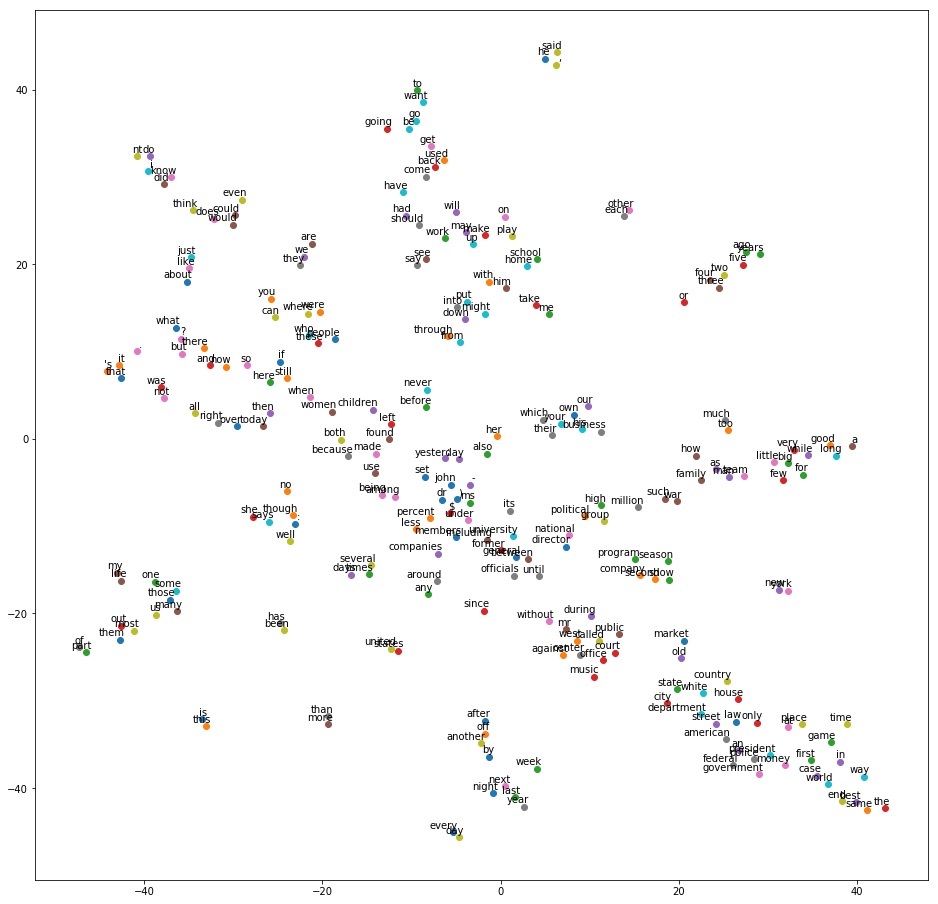

In [31]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def plot(word=None):
    if word is None:    #T-SNE
        tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=23)
        new_values = tsne_model.fit_transform(data)
        x = [v[0] for v in new_values]
        y = [v[1] for v in new_values]
    else:
        x = euclidean_distances([data[words[word]]], data)[0]
        y = cosine_similarity([data[words[word]]], data)[0]
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(indexes[i],
             xy=(x[i], y[i]),
             xytext=(5, 2),
             textcoords='offset points',
             ha='right',
             va='bottom')
    plt.show()

plot()

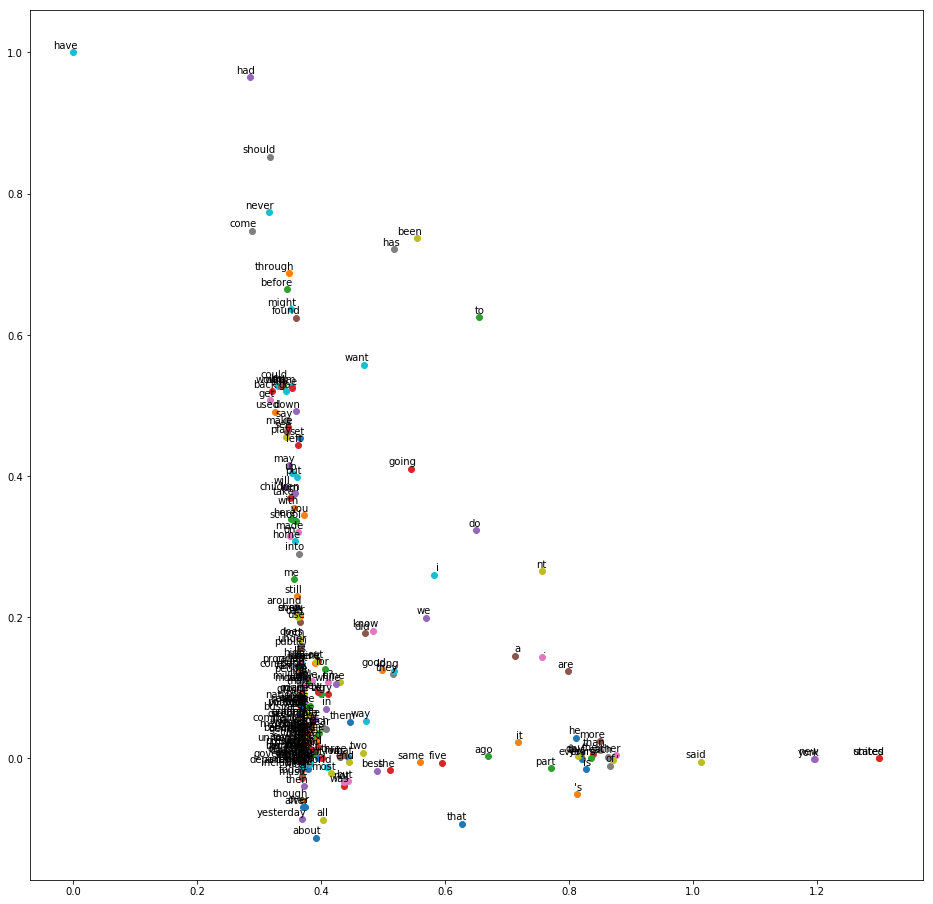

In [37]:
plot('have')